In [71]:
##importação de bibliotecas e definições gerais

import matplotlib.pyplot as plt

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

pd.options.display.float_format = '{:.2f}'.format

In [116]:
tipos = {
    'bugged_date': 'category',
    'deputy_id': np.int64,
    'political_party': 'category',
    'state_code': 'category',
    'deputy_name': object,
    'receipt_social_security_number': object,
    'receipt_description': object,
    'establishment_name': object,
    'receipt_value': np.float64
}
reembolsos = pd.read_csv('./deputies_reimbursements/deputies_dataset.csv', dtype=tipos, parse_dates=['receipt_date'])
reembolsos['receipt_year'] = pd.DatetimeIndex(reembolsos['receipt_date']).year

In [117]:
reembolsos.dtypes

bugged_date                             category
receipt_date                      datetime64[ns]
deputy_id                                  int64
political_party                         category
state_code                              category
deputy_name                               object
receipt_social_security_number            object
receipt_description                       object
establishment_name                        object
receipt_value                            float64
receipt_year                               int64
dtype: object

In [74]:
reembolsos.describe()

,deputy_id,receipt_value
count,3014902.00,3014902.00
mean,1869.10,579.16
std,701.48,1925.42
min,12.00,0.00
25%,1467.00,50.00
50%,1882.00,142.00
75%,2340.00,472.00
max,3173.00,215000.00


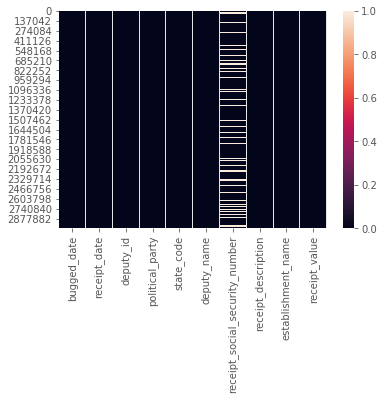

In [75]:
sns.heatmap(reembolsos.isnull())

In [35]:
# Não estou interessado em recibos em que eu não consiga identificar o CNPJ/CPF do estabelecimento, apesar disso, eventualmente 
# poderíamos avaliar o que consta aqui.
reembolsos.loc[reembolsos['receipt_social_security_number'].isnull()].describe()

,deputy_id,receipt_value
count,520952.00,520952.00
mean,1743.67,206.05
std,694.87,723.95
min,12.00,0.00
25%,1311.00,25.00
50%,1825.00,57.00
75%,2276.00,193.00
max,3173.00,149754.00


In [120]:
# Removendo recibos sem cpf/cnpj do fornecedor
# Também não tenho interesse em avaliar recibos com valor igual a 0.
reembolsos = reembolsos.loc[ (~ reembolsos['receipt_social_security_number'].isnull())]
reembolsos = reembolsos.loc[ (reembolsos['receipt_value']!=0)]
reembolsos.describe()

,deputy_id,receipt_value,receipt_year
count,2492434.00,2492434.00,2492434.00
mean,1895.31,657.49,2013.11
std,699.98,2083.12,2.47
min,12.00,1.00,2009.00
25%,1531.00,63.00,2011.00
50%,1896.00,160.00,2013.00
75%,2349.00,543.00,2015.00
max,3173.00,215000.00,2017.00


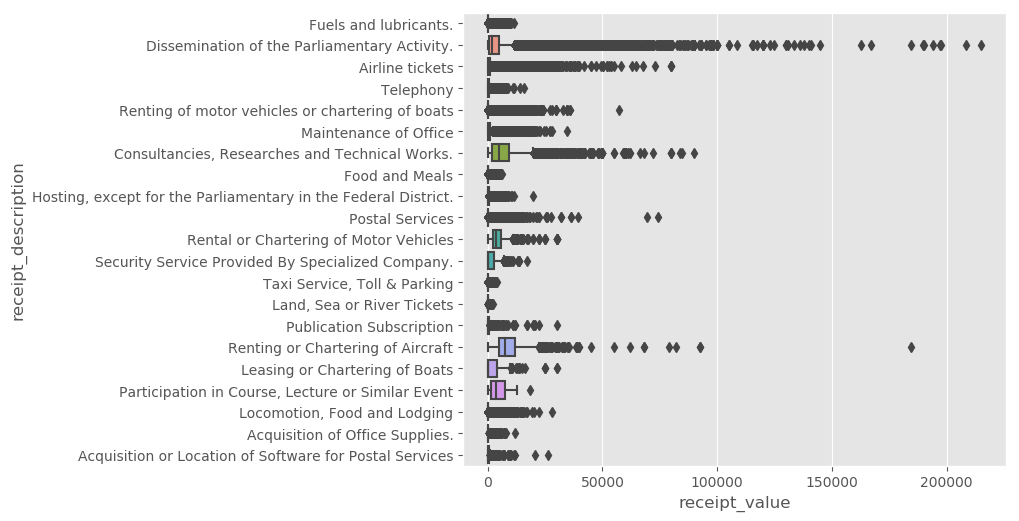

In [121]:
# Avaliação sobre a distribuição de valores em função do tipo de gasto
fig = plt.figure(figsize=(7,6), dpi=100)
sns.boxplot(data=reembolsos, y='receipt_description', x='receipt_value')

In [78]:
reembolsos.shape

(2492434, 10)

In [86]:
# Vou concentrar a análise nos gastos mais representativos, abandonando os outliers.
# Utilizando o zscore para remover outliers
receipt_value_z = stats.zscore(reembolsos['receipt_value'].values)
reembolsos = reembolsos[(receipt_value_z < 3)]
reembolsos.shape

(2457712, 10)

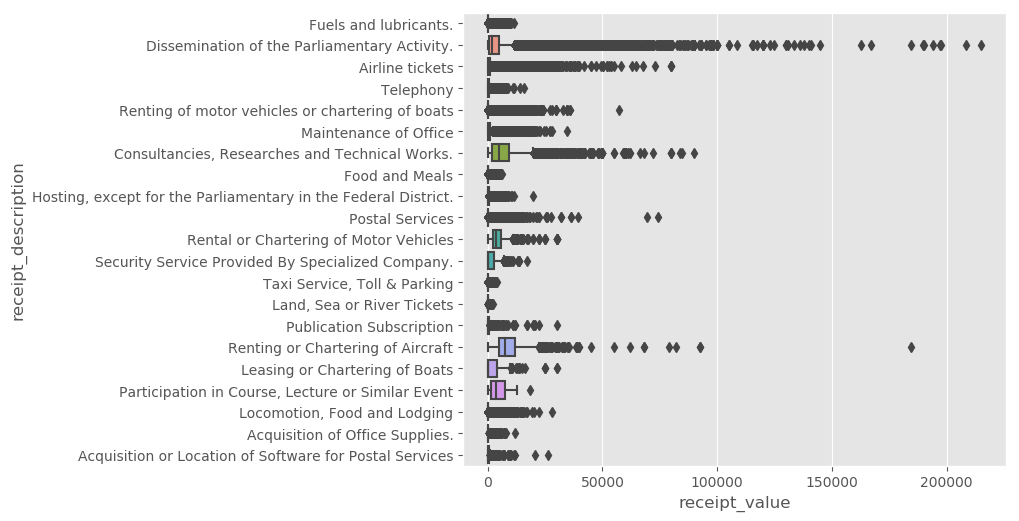

In [122]:
fig = plt.figure(figsize=(7,6), dpi=100)
sns.boxplot(data=reembolsos, x='receipt_value', y='receipt_description')

In [93]:
reembolsos['receipt_description'].unique()

array(['Fuels and lubricants.', 'Airline tickets', 'Telephony',
       'Renting of motor vehicles or chartering of boats',
       'Maintenance of Office',
       'Consultancies, Researches and Technical Works.', 'Food and Meals',
       'Hosting, except for the Parliamentary in the Federal District.',
       'Postal Services', 'Rental or Chartering of Motor Vehicles',
       'Dissemination of the Parliamentary Activity.',
       'Security Service Provided By Specialized Company.',
       'Taxi Service, Toll & Parking', 'Land, Sea or River Tickets',
       'Publication Subscription', 'Renting or Chartering of Aircraft',
       'Leasing or Chartering of Boats',
       'Participation in Course, Lecture or Similar Event',
       'Locomotion, Food and Lodging', 'Acquisition of Office Supplies.',
       'Acquisition or Location of Software for Postal Services'],
      dtype=object)

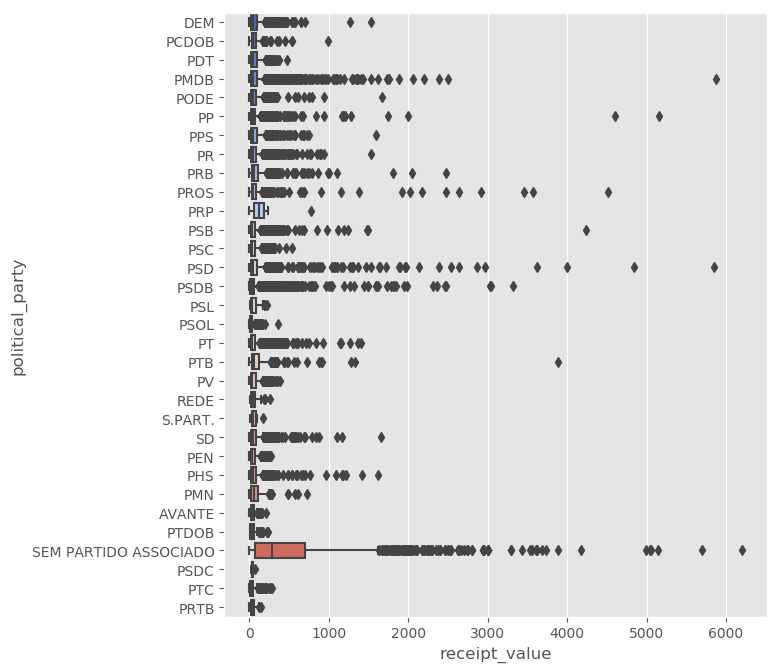

In [123]:
# reembolso_sub_analise = reembolsos[reembolsos['receipt_description']=='Consultancies, Researches and Technical Works.']
# reembolso_sub_analise = reembolsos[reembolsos['receipt_description']=='Fuels and lubricants.']
# reembolso_sub_analise = reembolsos[reembolsos['receipt_description']=='Leasing or Chartering of Boats']
# reembolso_sub_analise = reembolsos[reembolsos['receipt_description']=='Dissemination of the Parliamentary Activity.']
reembolso_sub_analise = reembolsos[reembolsos['receipt_description']=='Food and Meals']

fig = plt.figure(figsize=(7,8), dpi=100)
sns.boxplot(x="receipt_value", y="political_party",data=reembolso_sub_analise, palette="coolwarm")

C:\Users\Marco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Marco\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Marco\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 700x800 with 0 Axes>

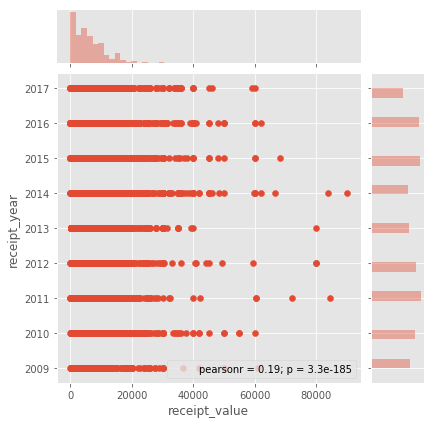

In [126]:
reembolso_sub_analise = reembolsos[reembolsos['receipt_description']=='Consultancies, Researches and Technical Works.']

fig = plt.figure(figsize=(7,8), dpi=100)
sns.jointplot(x='receipt_value',y='receipt_year',data=reembolso_sub_analise,kind='scatter')

In [ ]:
sns.pairplot(tips,hue='sex',palette='coolwarm')